# Yapay Sinir Ağları


Tensorflow, Pytorch, Keras, Sonnet ... ?


Keras ve Tensorflow, Tensorflow 2.0 versiyonu ile birleşti.

Tensorflow Google'ın ürünü, Pytorch FaceBook'un,Sonnet Google'ın deepMind şirketinin ...

 tf statik > pytorch > tf eager 
 
 Tensorflow avantajları:

   TPU (tensor processing unit) ile uyum.

   Frontend de tensorflow.js

   Mobil de tensorflow lite

   Tensorboard ile eğitim izlenebilir.
   



#Keras API

Veri
*   Veri yükle
*   gerekiyor ise veriyi düzenle

Keras Api
*   model oluştur (fonksiyonel veya sequentiall)
*   modeli derle (compile)
*   modeli eğit (fit)
*   modeli değerlendir (evaluate)
*   model ile tahmin et (predictions) 




---

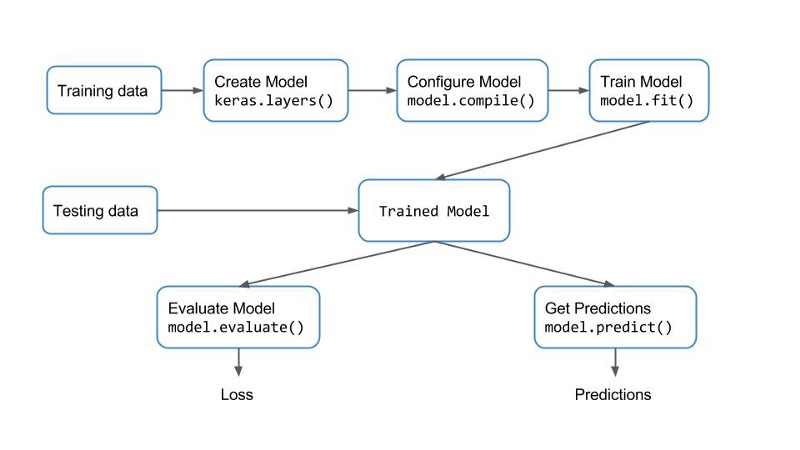



In [ ]:

import tensorflow as tf

tf.version


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:

  # Eger tensorflow 1.x versiyonlarında colabda çalışılacak ise bu kod kullanılır
  # Anaconda da ortamı kurarken tensorflow kurulur. versiyon burada seçilmez 
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

import tensorflow as tf

print(tf.VERSION)
#tf.VERSION tf 1.x te çalışır 2.x te tf.version çalışır

TensorFlow 1.x selected.
1.15.2


# Mnist
El yazısı rakam dataseti 

http://yann.lecun.com/exdb/mnist/


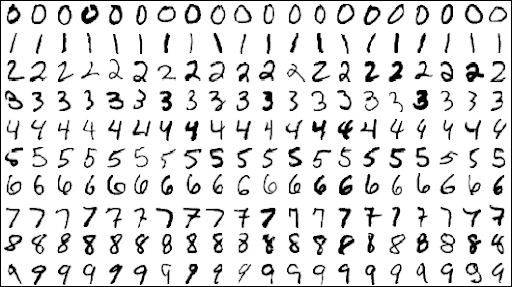





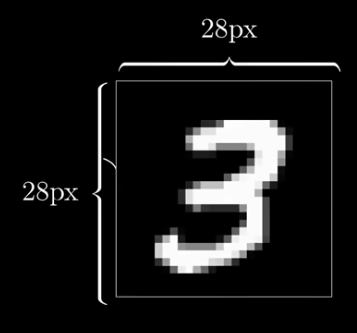

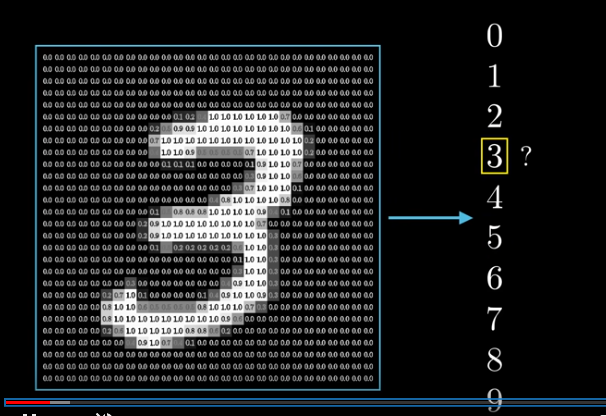

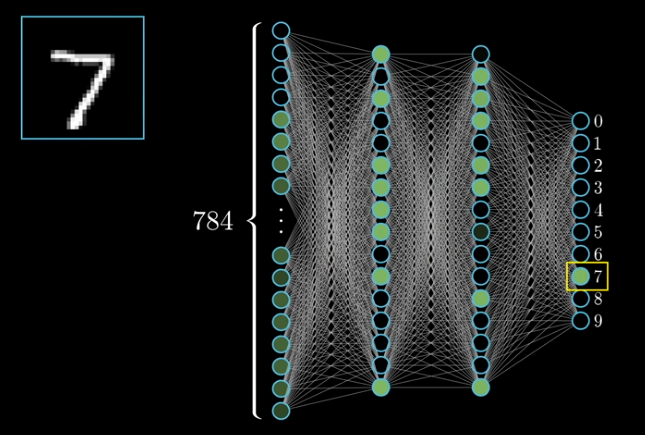

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
y_train[0] , x_train[0,:,:]

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


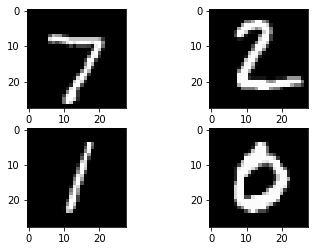

In [ ]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_test[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
 # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation=tf.nn.softmax)#activation='softmax'
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#optimizer sgd adam rmsprop
#cıktılar categorical olursa loss categorical_crossentropy olmalı

In [ ]:
model.fit(x_train, y_train, epochs=13)

Epoch 1/13
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4262 - accuracy: 0.8795
Epoch 2/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1212 - accuracy: 0.9648
Epoch 3/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0753 - accuracy: 0.9777
Epoch 4/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9825
Epoch 5/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9866
Epoch 6/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 7/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0271 - accuracy: 0.9915
Epoch 8/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0209 - accuracy: 0.9942
Epoch 9/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 10/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.013

In [ ]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9726


[0.08826782554388046, 0.972599983215332]

In [ ]:
model.predict(x_test[0:2,:,:])

array([[1.0612033e-06, 8.7735664e-08, 1.2773149e-05, 4.4525205e-04,
        2.5398426e-08, 3.5736393e-06, 9.2045582e-10, 9.9949110e-01,
        2.7450118e-05, 1.8621513e-05],
       [1.4598439e-08, 5.1741481e-05, 9.9991179e-01, 2.4164056e-05,
        1.6194572e-12, 6.9730959e-07, 3.9401558e-09, 1.5288101e-11,
        1.1520372e-05, 7.7992068e-10]], dtype=float32)

In [ ]:
print(y_test[0:2])

[7 2]


In [ ]:
#aynı modeli çıktıları categorical yapıp derliyor ve eğitiyoruz
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#optimizer sgd adam rmsprop
#cıktılar categorical olursa loss categorical_crossentropy olmalı

In [ ]:
from keras.utils import to_categorical

y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

model.fit(x_train, y_train_cat, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4159 - accuracy: 0.8844
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0725 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9825


In [ ]:
model.evaluate(x_test,  y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0911 - accuracy: 0.9770


[0.09114028513431549, 0.9769999980926514]

In [ ]:
print(y_test_cat.shape)
print(y_test.shape)
print(y_test[0])
print(y_test_cat[0])

(10000, 10)
(10000,)
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


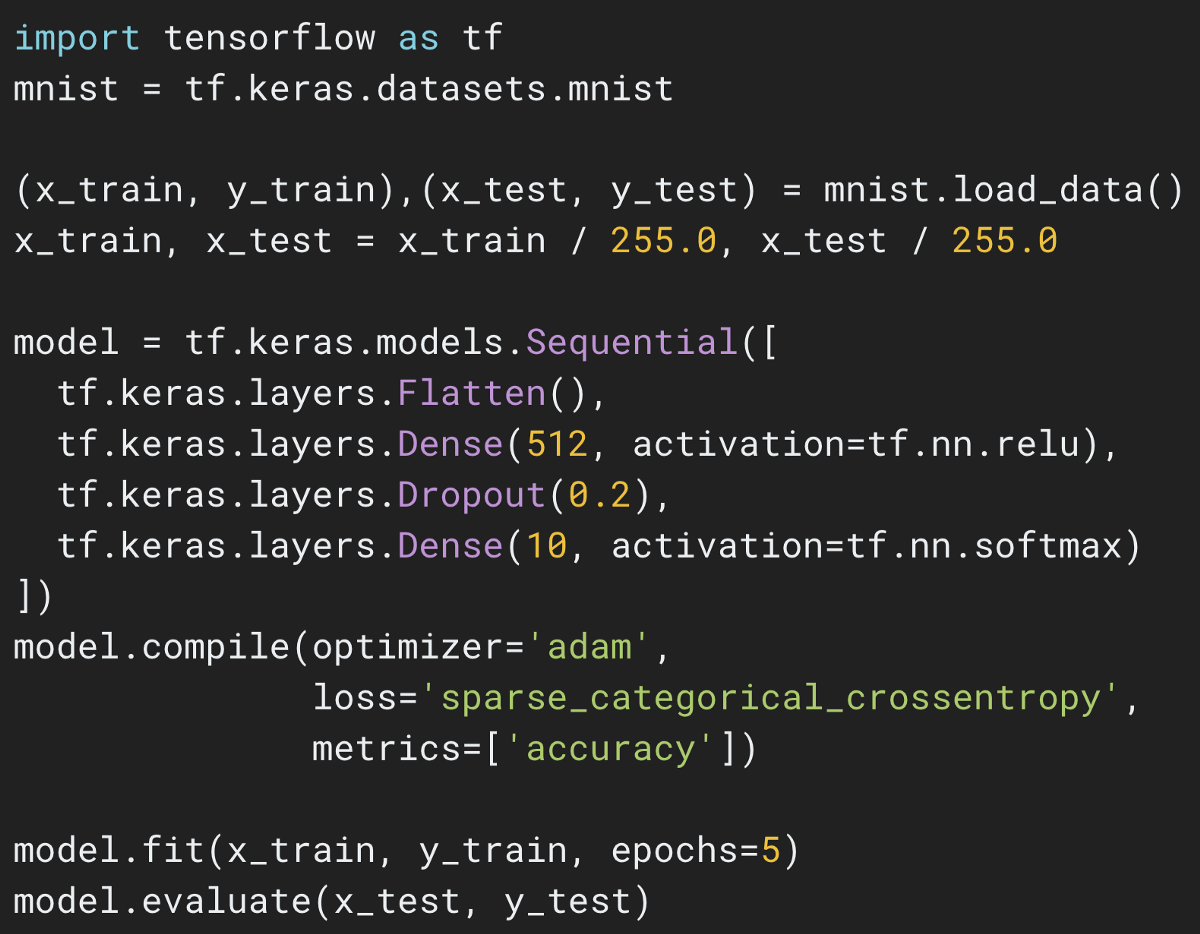